In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

In [3]:
audio_files = glob('data/MEMD_audio/*.mp3')
audio_files

['data/MEMD_audio\\10.mp3',
 'data/MEMD_audio\\1000.mp3',
 'data/MEMD_audio\\1001.mp3',
 'data/MEMD_audio\\1002.mp3',
 'data/MEMD_audio\\1003.mp3',
 'data/MEMD_audio\\1004.mp3',
 'data/MEMD_audio\\1005.mp3',
 'data/MEMD_audio\\1006.mp3',
 'data/MEMD_audio\\1007.mp3',
 'data/MEMD_audio\\1008.mp3',
 'data/MEMD_audio\\1009.mp3',
 'data/MEMD_audio\\101.mp3',
 'data/MEMD_audio\\1010.mp3',
 'data/MEMD_audio\\1011.mp3',
 'data/MEMD_audio\\1012.mp3',
 'data/MEMD_audio\\1013.mp3',
 'data/MEMD_audio\\1014.mp3',
 'data/MEMD_audio\\1015.mp3',
 'data/MEMD_audio\\1016.mp3',
 'data/MEMD_audio\\1017.mp3',
 'data/MEMD_audio\\1018.mp3',
 'data/MEMD_audio\\1019.mp3',
 'data/MEMD_audio\\102.mp3',
 'data/MEMD_audio\\1020.mp3',
 'data/MEMD_audio\\1021.mp3',
 'data/MEMD_audio\\1022.mp3',
 'data/MEMD_audio\\1023.mp3',
 'data/MEMD_audio\\1024.mp3',
 'data/MEMD_audio\\1025.mp3',
 'data/MEMD_audio\\1026.mp3',
 'data/MEMD_audio\\1027.mp3',
 'data/MEMD_audio\\1028.mp3',
 'data/MEMD_audio\\1029.mp3',
 'data/MEMD_au

In [4]:
ipd.Audio(audio_files[45]) # solo sirve pa escuhcar el audio

In [5]:
y, sr = librosa.load(audio_files[45]) # y = el audio a procesar, sr = int que representa la frecuencia de muestreo 

In [6]:
print(sr)
print('\n',y.shape)
y[:25]

22050

 (992251,)


array([ 0.00406562,  0.00199277, -0.00508646, -0.0129218 , -0.02540984,
       -0.02854558, -0.02497773, -0.02479211, -0.02553074, -0.02848961,
       -0.03973608, -0.04145514, -0.03601619, -0.03413231, -0.02579024,
       -0.02375266, -0.02933707, -0.0130274 ,  0.00664452,  0.01248337,
        0.01349307,  0.02170198,  0.02038563,  0.01331777,  0.00988341],
      dtype=float32)

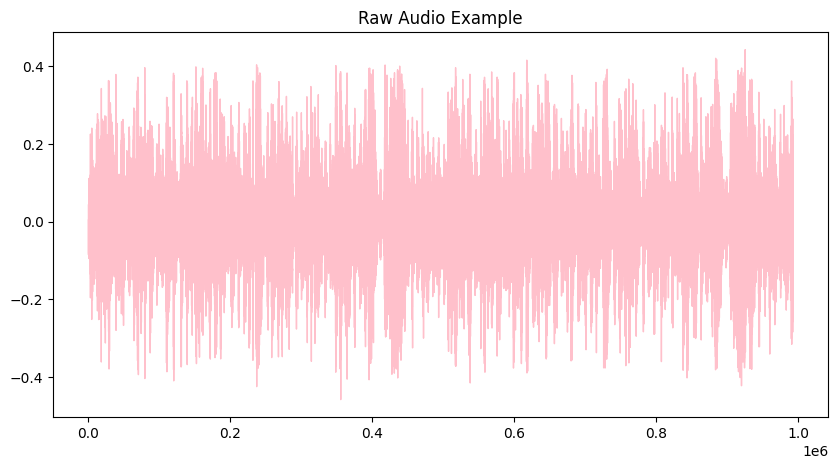

In [10]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                  color = 'pink')
plt.show()

In [ ]:
# y_trimmed, _ = librosa.effects.trim(y, top_db=20) # lo que hace es cortar el audio si empieza/termina en silencio, top_db ajusta los decibelios a lso q percibe y corta

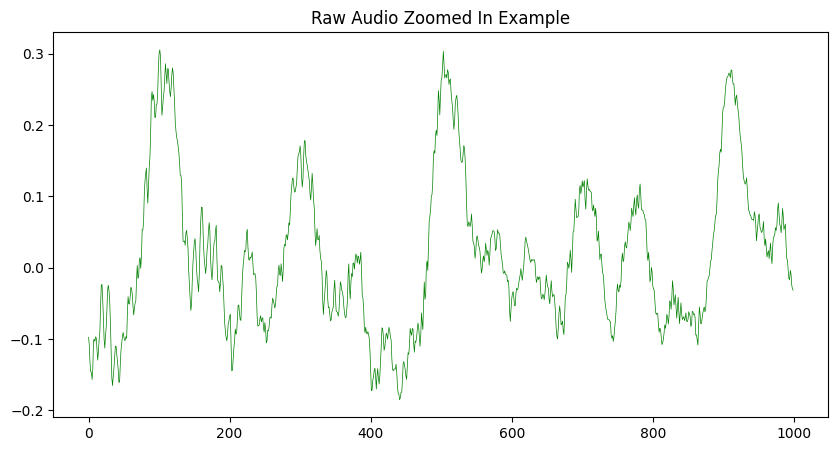

In [15]:
#zoomear en una parte del audio pq tiene mazo detalle y pues como q hay cosas q no se ven

pd.Series(y[30400:31400]).plot(figsize=(10, 5),
                  lw=0.5,
                  title='Raw Audio Zoomed In Example',
                 color='green')
plt.show()

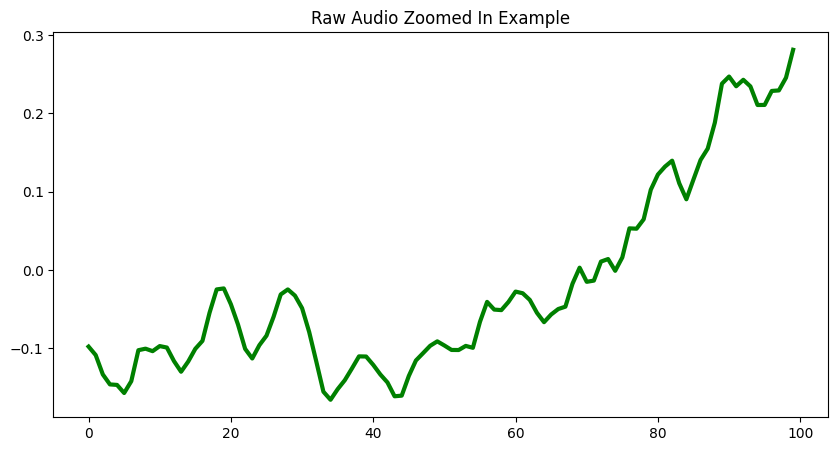

In [19]:
pd.Series(y[30400:30500]).plot(figsize=(10, 5),
                  lw=3,
                  title='Raw Audio Zoomed In Example',
                 color='green')
plt.show()

In [22]:
D = librosa.stft(y) # short term fourier transformation (descomposicion tiempo frecuencia)
D.shape

(1025, 1938)

In [ ]:
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max) #Convierte las amplitudes de un espectrograma en una escala logarítmica  dB
S_db.shape

(1025, 1938)

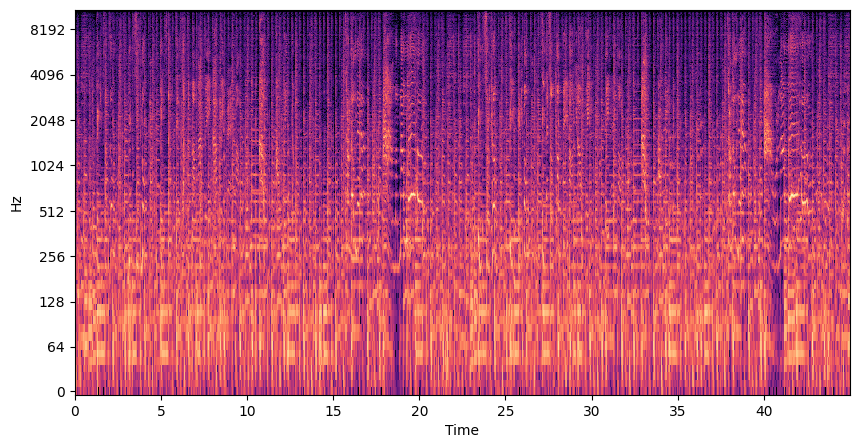

In [35]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db[:],
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
plt.show()

In [40]:
S = librosa.feature.melspectrogram(y=y , sr= sr, n_mels= 128) #n_mels define cuántas bandas de frecuencia se dividirán en la escala Mel, a más bandas mas precisión
S

array([[2.9495251e-01, 2.6211253e-01, 1.7550161e+00, ..., 3.7156417e+00,
        9.9473423e-01, 1.3654623e+00],
       [1.0621738e+00, 1.5340085e+00, 2.4120922e+00, ..., 5.8580559e+01,
        3.3493484e+01, 4.2310081e+01],
       [6.2625761e+00, 1.6179239e+01, 1.0606758e+01, ..., 3.9630344e+01,
        3.7646992e+01, 5.2395321e+01],
       ...,
       [3.4240031e-05, 9.9365767e-05, 9.6599484e-05, ..., 1.4500323e-03,
        1.3437315e-03, 1.0570552e-03],
       [1.4221117e-05, 4.0995772e-05, 4.0622381e-05, ..., 4.7268686e-04,
        3.4306827e-04, 2.8912490e-04],
       [8.5560748e-07, 3.7880141e-06, 5.9941481e-06, ..., 7.9671270e-05,
        6.8962552e-05, 3.3973894e-05]], dtype=float32)